In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# 손글씨 숫자 이미지 데이터셋
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train : 손글씨 숫자 이미지 자체
# y_train : 이미지가 의미하는 숫자
# x_test : 손글씨 숫자 이미지
# y_test : 이미지가 의미하는 숫자
# train : 학습의 용도, test : 학습이 잘 되었는지 확인하는 용도

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
# 손 글씨 숫자 이미지 데이터는 0 ~ 255 사이의 값을 갖는다.
# 모델의 훈련에 사용하기 전에 0 ~ 1 사이의 범위를 갖도록 변경해 주는 과정이다. ->  지도 학습 데이터

In [4]:
# Model 생성
model = tf.keras.models.Sequential([ 
  # 크기 : 28 * 28 배열을 입력받아 1차원의 배열로 반환
  # 시퀀셜 모델 : 가장 간단하게 만들 수 있는 기본형 모델

  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  # 인풋으로 받는 데이터가 28, 28 이고, 이 데이터를 평평하게 만들어 주겠다. 
  # 실제 레이어로 포함되지 않는다.(히든 레이어, 딥러닝의 요소로 포함되지 않는다.)
  
  tf.keras.layers.Dense(128, activation='relu'),
  # 노드 갯수는 128개, 활성화 함수로 relu 를 사용한다.
  # 128 개의 파라미터를 이용하여 계산한다. (2진법 연산 파라미터) > 활성화 함수에 따라 달라지는 고정값

  tf.keras.layers.Dropout(0.2),
  # 오버피팅 방지를 위해 이전 레이어의 출력을 20% 섞는다. > 한 쪽에 데이터가 섞이는 현상을 방지하기 위해

  tf.keras.layers.Dense(10, activation='softmax')
  # 출력 레이어의 노드 갯수를 10개로 설정하고, 활성화 함수로 softmax 를 사용하겠다.
  # 계산 레이어
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', # 오차함수, 로스함수에 멀티밸류를 사용하는 소프트맥스를 사용하면 무조건 카테고리컬 크로스엔트로피 함수를 사용해야 한다.
              metrics=['accuracy'] # 결과를 퍼센트 값으로 나타낸다.
              )

In [5]:
# Traning
model.fit(x_train, y_train, epochs=10) # 10 번 학습한다.
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2905 - accuracy: 0.9161
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1427 - accuracy: 0.9577
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1057 - accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0874 - accuracy: 0.9722
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0746 - accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0655 - accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0556 - accuracy: 0.9825
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0521 - accuracy: 0.9830
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0465 - accuracy: 0.9845
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.069

[0.0695018470287323, 0.9804999828338623]

In [6]:
# x_train 의 랜덤한 가격을 추출한다.
import numpy as np
import matplotlib.pyplot as plt

# x_train의 갯수 중 랜덤한 갯수를 추출한다.
idx = np.random.randint(len(x_train))
image = x_train[idx]

<function matplotlib.pyplot.show>

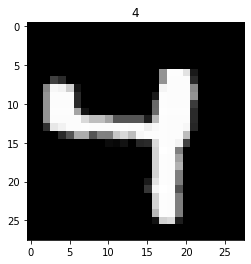

In [7]:
# 이미지를 확인
plt.imshow(image, cmap='gray') # 이미지값
plt.title(y_train[idx]) # 정답값
plt.show

In [8]:
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys() : 
  print('업로드 파일 이름 : {name}, 용량 : {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving image5.png to image5.png
업로드 파일 이름 : image5.png, 용량 : 317 bytes


/content/image5.png


<function matplotlib.pyplot.show>

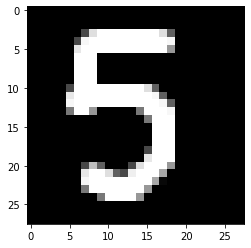

In [9]:
# image file 의 경로 설정
cur_dir = os.getcwd() # 현재 dir 의 경로가 저장된다.
img_path = os.path.join(cur_dir, 'image5.png')
print(img_path)
cur_img = Image.open(img_path)

# 28 * 28 로 사이즈를 변경
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

try : # color image 일 경우에는 RGB 의 평균값의 gray scale 로 적용되도록 예외처리
  image = np.mean(image, axis=2)
  # OpenCV 에는 gray scale 로 바꾸는 함수가 존재, 그러나 간단하게 변경하기 위해 평균치를 사용하면 사람의 눈에 gray scale 로 보이게 됨
except : 
  pass


# 업로드한 파일을 검은 배경에 흰 글씨로 바꾸기 위해 색을 반전
image = np.abs(255 - image) # 숫자 - 행렬 의 연산

# MNIST 와 동일하게 데이터 전처리 (data preprocessing : 정규화)
image = image.astype(np.float32) / 255 
# 255 = 밝기값, 2진법으로 계산되지 않는 숫자이기 때문에 255로 나누어 0/1 사이의 숫자로 바꾸어 

# 화면에 출력
plt.imshow(image, cmap='gray')
plt.show

In [10]:
# shape 를 변경하여 학습된 model 에 넣고 결과를 확인
image = np.reshape(image, (1, 28, 28)) # 이미지, 이미지의 장수, 픽셀사이즈, * 픽셀사이즈
print(model.predict(image))

print('model 이 예측한 값 : {}'.format(np.argmax(model.predict(image), -1)))
# argument 의 max 값을 찾는데 한 개의 값만을 추출하도록 함 (파라미터 = index, -1 : None)

[[4.2348246e-17 1.5303493e-11 2.0270867e-10 1.0546174e-02 3.3261767e-14
  9.8945379e-01 2.4715857e-12 3.9510973e-12 1.4899529e-09 1.4334560e-09]]
model 이 예측한 값 : [5]


In [11]:
# Dataset

mnist = keras.datasets.fashion_mnist
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)
type(train_images)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


numpy.ndarray

In [12]:
# training set 의 각 class 별 image 의 갯수를 확인
unique, counts = np.unique(train_labels, axis=-1, return_counts=True) # axis -1 = 열, unique = 종류, count = 갯수
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [13]:
# test set 의 각 class 별 image 의 갯수를 확인
unique, counts = np.unique(test_labels, axis=-1, return_counts=True) # axis -1 = 열, unique = 종류, count = 갯수
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

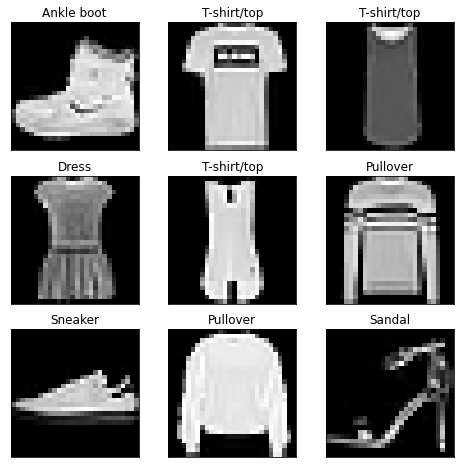

In [14]:
plt.figure(figsize=(8, 8))
for i in range(9) : 
  plt.subplot(3, 3, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap='gray')
  plt.title(class_name[train_labels[i]])
plt.show()

In [15]:
# 데이터 전처리
# image 를 0 ~ 1 사이의 값으로 정규화 하기 위해 255 로 나누어줌
train_image = train_images.astype(np.float32) / 255
test_image = test_images.astype(np.float32) / 255

# one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [16]:
# dataset 만들기
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(buffer_size=100000).batch(64)
# shuffle : 셔플을 하지 않으면 데이터가 중복될 가능성이 있어 학습의 효율이 떨어진다. 따라서 epochs 할 때 셔플을 사용한다는 옵션이다.
# buffer_size : 임시로 저장할 공간을 어느정도 생성할지(byte) 결정한다.
# tensor_slice : 텐서의 형태로 재구축한다.
# batch : 한 번에 몇 개의 데이터를 처리할지 결정한다.
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

Feature batch shape : (64, 28, 28)
Label batch shape : (64, 10)


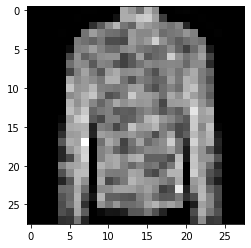

Label : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [17]:
# Dataset 을 통해 반복(iterate)
imgs, lbs = next(iter(train_dataset))
# iter : 데이터를 탐색하는 함수
print(f'Feature batch shape : {imgs.shape}')
print(f'Label batch shape : {lbs.shape}')

img = imgs[0]
lb = lbs[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label : {lb}')

In [18]:
# Custom Dataset 만들기
a = np.arange(10)
print(a)
print('-' * 50)

ds_tensors = tf.data.Dataset.from_tensor_slices(a)
print(ds_tensors)
print('-' * 50)

for x in ds_tensors : 
  print(x)

[0 1 2 3 4 5 6 7 8 9]
--------------------------------------------------
<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
--------------------------------------------------
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [19]:
# shuffle(정수) : 큐 사이즈 만큼 셔플
ds_tensors = ds_tensors.map(tf.square).shuffle(10).batch(2)

In [20]:
for _ in range(3) : 
  for x in ds_tensors : 
    print(x)
  print('-' * 50)

tf.Tensor([49 64], shape=(2,), dtype=int64)
tf.Tensor([16  9], shape=(2,), dtype=int64)
tf.Tensor([0 4], shape=(2,), dtype=int64)
tf.Tensor([81 25], shape=(2,), dtype=int64)
tf.Tensor([ 1 36], shape=(2,), dtype=int64)
--------------------------------------------------
tf.Tensor([25  9], shape=(2,), dtype=int64)
tf.Tensor([64 36], shape=(2,), dtype=int64)
tf.Tensor([49  4], shape=(2,), dtype=int64)
tf.Tensor([16 81], shape=(2,), dtype=int64)
tf.Tensor([1 0], shape=(2,), dtype=int64)
--------------------------------------------------
tf.Tensor([9 0], shape=(2,), dtype=int64)
tf.Tensor([16  1], shape=(2,), dtype=int64)
tf.Tensor([ 4 25], shape=(2,), dtype=int64)
tf.Tensor([49 64], shape=(2,), dtype=int64)
tf.Tensor([81 36], shape=(2,), dtype=int64)
--------------------------------------------------


In [30]:
# 텐서플로우에서는 3 가지 모델 작성방법을 제공한다.
# 가장 간단하고 쉽게 만들 수 있는 방법 : Keras 의 Sequential API 를 사용한다.

def create_seq_model() : 
  model = keras.Sequential() # 시퀀셜의 객체(파라미터) = 모델
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.2)) # 치우침을 방지하기 위해 20% 를 섞어줌
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [31]:
seq_model = create_seq_model()

In [32]:
seq_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Keras Functional API 를 사용하는 방법
# Sequential 은 쌓이는 구조로만 모델을 생성하기 때문에 다양한 가지치기와 같은 모델 레이어를 생성하는 것이 가능하다.

def create_func_model()  : 
  inputs = keras.Input(shape=(28, 28)) # input 레이어를 따로 생성하여 파라미터로 사용한다.
  flatten = keras.layers.Flatten()(inputs)
  dense = keras.layers.Dense(128, activation='relu')(flatten)
  drop = keras.layers.Dropout(0.2)(dense)
  outputs = keras.layers.Dense(10, activation='softmax')(drop)
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model

In [59]:
func_model = create_func_model()

In [60]:
func_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [61]:
# keras.Model 을 상속받아 사용하는 파이토치 응용

class SubClassModel(keras.Model) : 

  def __init__(self) : 
    super(SubClassModel, self).__init__()
    self.flatten = keras.layers.Flatten(input_shape=(28, 28))
    self.dense1 = keras.layers.Dense(128, activation='relu')
    self.drop = keras.layers.Dropout(0.2)
    self.dense2 = keras.layers.Dense(10, activation='softmax')
  
  # 객체를 생성 후 객체에 inputs를 넣어 실행할 때 call 함수가 자동으로 실행된다. (keras.Model 의 특성)
  # call 함수를 오버라이딩 한다.
  def call(self, x, training=False) : 
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.drop(x)
    return self.dense2(x)


In [62]:
subclass_model = SubClassModel()

In [63]:
inputs = tf.zeros((1, 28, 28))
subclass_model(inputs)
# subclass_model = SubClassModel()(inputs) 와 같다

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32)>

In [64]:
subclass_model.summary()

Model: "sub_class_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  100480    
                                                                 
 dropout_9 (Dropout)         multiple                  0         
                                                                 
 dense_19 (Dense)            multiple                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Keras API 사용하기
learning_rate = 0.001
seq_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy']) 
# 옵티마이저 : 모델이 작동할때 어떤 방식으로 최적의 값을 찾을 것인지를 결정
# 옵티마이저의 기울기가 너무 크면 최적의 값을 찾지 못하고, 기울기가 너무 작으면 시간이 너무 오래 걸림.

In [67]:
history = seq_model.fit(train_dataset, epochs=10, validation_data=test_dataset)
# history 변수에 모델을 학습시킨 결과를 저장한다.

Epoch 1/10
938/938 [==============================] - 4s 5ms/step - loss: 0.8510 - accuracy: 0.6786 - val_loss: 0.7286 - val_accuracy: 0.7365
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.7958 - accuracy: 0.6986 - val_loss: 0.7522 - val_accuracy: 0.7287
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.7538 - accuracy: 0.7282 - val_loss: 0.6011 - val_accuracy: 0.7950
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.7301 - accuracy: 0.7379 - val_loss: 0.6340 - val_accuracy: 0.7851
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.7056 - accuracy: 0.7464 - val_loss: 0.6217 - val_accuracy: 0.7975
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.7013 - accuracy: 0.7521 - val_loss: 0.6028 - val_accuracy: 0.8099
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.6861 - accuracy: 0.7574 - val_loss: 0.5776 - val_accuracy: 0.8140
Epoch 

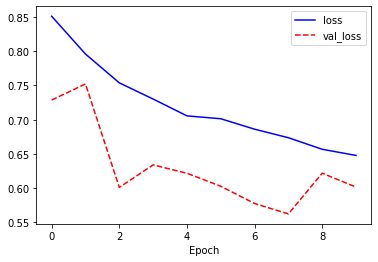

In [68]:
plt.plot(history.history['loss'], 'b-', label='loss') # training 중 발생한 오차값
plt.plot(history.history['val_loss'], 'r--', label='val_loss') # 검산 중 발생한 오차값
plt.xlabel('Epoch')
plt.legend()
plt.show()

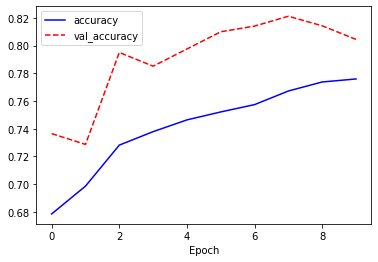

In [69]:
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [70]:
# Model 저장하고 불러오기
# 학습된 결과를 저장하고 사용하거나, 이어서 학습하기 위해 모델을 저장하고 불러오는 방법
seq_model.save_weights('seq_model.ckpt')

In [73]:
# 새로운 모델 생성
seq_model_2 = create_seq_model()
seq_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [74]:
seq_model_2.evaluate(test_dataset)

157/157 [==============================] - 1s 4ms/step - loss: 301.2857 - accuracy: 0.0129


[301.2857360839844, 0.012900000438094139]

In [75]:
# 학습된 ckpt를 적용하기
seq_model_2.load_weights('seq_model.ckpt')

In [76]:
seq_model_2.evaluate(test_dataset)

157/157 [==============================] - 0s 3ms/step - loss: 0.6016 - accuracy: 0.8044


[0.6015579104423523, 0.8044000267982483]

In [77]:
# 모델 자체를 저장하고 불러오는 방법
seq_model.save('seq_model') # 폴더로 생성된다.

INFO:tensorflow:Assets written to: seq_model/assets


In [78]:
seq_model_3 = keras.models.load_model('seq_model')

In [79]:
seq_model_3.evaluate(test_dataset)

157/157 [==============================] - 1s 3ms/step - loss: 0.6016 - accuracy: 0.8044


[0.6015579104423523, 0.8044000267982483]